In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [36]:
img = cv2.imread(
    '/home/ch/gm_d/datasets/coco_dtu_dtu_tr/dtu_training/dtu_training/mvs_training/dtu/Rectified/scan29_train/rect_032_6_r5000.png')


img_t = torch.from_numpy(img).permute(2,0,1).unsqueeze(0).float()


angle = np.pi / 4

cos_a = np.cos(angle)
sin_a = np.sin(angle)
rotation_matrix = torch.tensor([[cos_a, -sin_a], [sin_a, cos_a]]).float()
img_t.shape

torch.Size([1, 3, 512, 640])

In [37]:
# 生成采样网格
N,C,H, W = img_t.shape
grid_y, grid_x = torch.meshgrid(
    torch.linspace(-1, 1, H), torch.linspace(-1, 1, W), indexing='ij')
grid = torch.stack((grid_x, grid_y), dim=2)
grid = grid @ rotation_matrix
grid = grid.unsqueeze(0).repeat(N, 1, 1, 1)
grid.shape

torch.Size([1, 512, 640, 2])

## 线性变换后，直接用grid_sample完成了插值

In [38]:
transformed_img = F.grid_sample(
    img_t, grid, mode='bilinear', padding_mode='zeros', align_corners=True)
transformed_img.shape


torch.Size([1, 3, 512, 640])

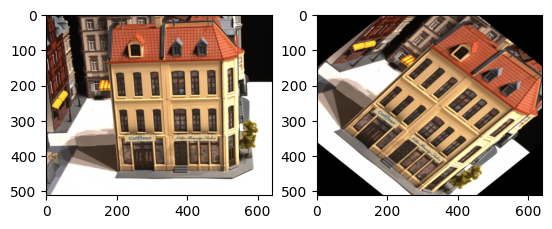

In [43]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
plt.subplot(122)
plt.imshow(transformed_img[0].permute(1,2,0).numpy().astype(np.uint8)[:, :, ::-1])
plt.show()
